In [1]:
%reset -f
import pandas as pd
import numpy as np
import copy
from collections import deque
from pandas.core.frame import DataFrame
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Sample Data
df = pd.DataFrame(np.random.randint(0,1000,size=(10000, 1)),columns = ["x1"])
df["x2"] = np.random.randint(500,1500,size=(10000, 1))
df['GroupKey'] = np.random.choice(a=[10, 20, 30,40,50,60,70,80,90,100],
  size=10000,p=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
df['Cat1'] = np.random.choice(a=[100, 200, 300,400,99,33,45,6,7,8,3,3333,32],
  size=10000,p=[1/13,1/13,1/13,1/13,1/13,1/13,1/13,1/13,1/13,1/13,1/13,1/13,1/13])
df['ID'] = df.index

In [3]:
df.head(10)

,x1,x2,GroupKey,Cat1,ID
0,509,614,40,33,0
1,62,985,20,45,1
2,932,1244,40,3333,2
3,977,777,90,400,3
4,804,827,90,32,4
5,198,1206,100,99,5
6,54,663,40,6,6
7,425,965,80,3,7
8,220,902,90,200,8
9,383,588,40,400,9


In [4]:
#stratified sampling by Kmeans++
#Rescale independent variable & deal null problem before use it
def KMeans_stratified_sampling(data,k_col,K=0,Feat_decimal_mark=3,
                               elbow=False,elbow_K_range=range(1,10)):
    #initial
    tmp_kmeans_data = round(data[k_col],Feat_decimal_mark) #取小數第幾位
    #Elbow Method
    if elbow==True:
        distortions = []
        K = elbow_K_range
        for k in K:
            kmeanModel = KMeans(n_clusters=k).fit(tmp_kmeans_data)
            kmeanModel.fit(tmp_kmeans_data)
            distortions.append(sum(np.min(cdist(tmp_kmeans_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tmp_kmeans_data.shape[0])
        ## Plot the elbow
        plt.rc('figure', figsize=(11.69,8.27))
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method showing the optimal k')
        plt.show()
        return
    
    #Stratified Sampling
    K_det = K
    tmp_kmeans_array = tmp_kmeans_data.values
    K_func = KMeans(n_clusters=K_det,n_jobs=-1)
    K_func.fit(tmp_kmeans_array)
    K_dis=[]
    for i in range(len(tmp_kmeans_array)):
        K_dis.append(round(sum(abs(tmp_kmeans_array[i]- K_func.cluster_centers_[K_func.labels_[i]])),Feat_decimal_mark))
    
    unique, counts = np.unique(K_func.labels_, return_counts=True)
    K_dict = dict(zip(unique, counts))
    print(dict(zip(unique, counts)))
    data['K_Group'] = K_func.labels_
    data['K_Dis'] = K_dis 
    globals()['data_'+str(K)+'means'] = data
    globals()['K_dict'] = K_dict

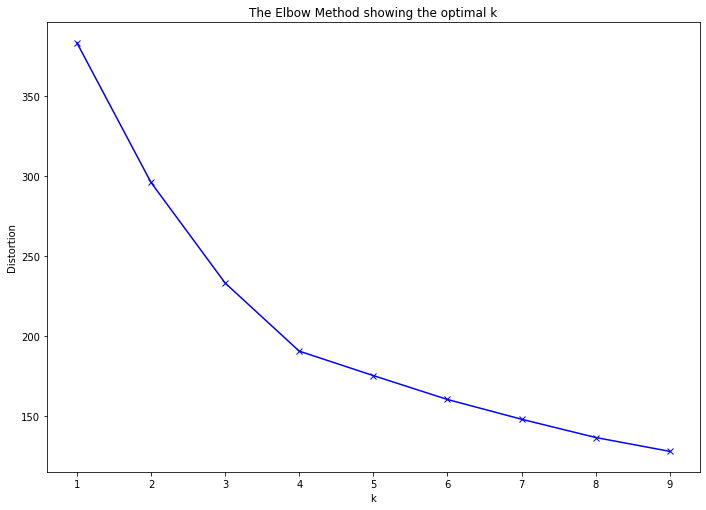

TypeError: '<' not supported between instances of 'int' and 'range'

In [5]:
#Elbow test
KMeans_stratified_sampling(data=df,k_col=['x1','x2'],elbow=True)

#optimize K might be 4!

In [6]:
#KMeans_stratified_sampling
KMeans_stratified_sampling(data=df,k_col=['x1','x2'],
                           K=4,Feat_decimal_mark=3,
                           elbow=False,elbow_K_range=range(1,10))

{0: 2551, 1: 2425, 2: 2464, 3: 2560}


In [7]:
data_4means.head(10)


,x1,x2,GroupKey,Cat1,ID,K_Group,K_Dis
0,509,614,40,33,0,1,383.464
1,62,985,20,45,1,0,437.823
2,932,1244,40,3333,2,2,186.629
3,977,777,90,400,3,1,247.536
4,804,827,90,32,4,1,124.536
5,198,1206,100,99,5,3,83.420
6,54,663,40,6,6,0,284.316
7,425,965,80,3,7,0,388.684
8,220,902,90,200,8,0,196.823
9,383,588,40,400,9,0,280.177
